In [2]:
# API KEY를 환경변수로 관리하기 위한 설정 파일
from dotenv import load_dotenv

# API KEY 정보로드
load_dotenv()

True

[LangSmith](https://smith.langchain.com) 추적 설정

In [ ]:
# import os

# os.environ["LANGCHAIN_TRACING_V2"] = "true"                   # true: 활성화, false: 비활성화
# os.environ["LANGCHAIN_PROJECT"] = "LangChain Project ID 입력"  # 프로젝트명을 기입해주세요

## ChatOpenAI

OpenAI 사의 채팅 전용 Large Language Model(llm) 입니다.

객체를 생성할 때 다음을 옵션 값을 지정할 수 있습니다. 옵션에 대한 상세 설명은 다음과 같습니다.

`temperature`

- 사용할 샘플링 온도는 0과 2 사이에서 선택합니다. 0.8과 같은 높은 값은 출력을 더 무작위하게 만들고, 0.2와 같은 낮은 값은 출력을 더 집중되고 결정론적으로 만듭니다.

`max_tokens`

- 채팅 완성에서 생성할 토큰의 최대 개수입니다.

`model_name`: 적용 가능한 모델 리스트
- `gpt-3.5-turbo`
- `gpt-4-turbo`
- `gpt-4o`

![gpt-models.png](./images/gpt-models.png)

- 링크: https://platform.openai.com/docs/models


In [3]:
from langchain_openai import ChatOpenAI

# 객체 생성
llm = ChatOpenAI(
    temperature=0.1,  # 창의성 (0.0 ~ 2.0)
    model_name="gpt-4o",  # 모델명
)

# 질의내용
question = "대한민국의 수도는 어디인가요?"

# 질의
print(f"[답변]: {llm.invoke(question)}")

[답변]: content='대한민국의 수도는 서울특별시입니다. 서울은 대한민국의 정치, 경제, 문화의 중심지로서 중요한 역할을 하고 있습니다.' response_metadata={'token_usage': {'completion_tokens': 31, 'prompt_tokens': 16, 'total_tokens': 47}, 'model_name': 'gpt-4o', 'system_fingerprint': 'fp_319be4768e', 'finish_reason': 'stop', 'logprobs': None} id='run-1f8854d7-a466-4df4-8e97-7654be7d5921-0' usage_metadata={'input_tokens': 16, 'output_tokens': 31, 'total_tokens': 47}


### 답변의 형식(AI Message)

In [4]:
# 질의내용
question = "대한민국의 수도는 어디인가요?"

# 질의
response = llm.invoke(question)

In [5]:
response

AIMessage(content='대한민국의 수도는 서울특별시입니다. 서울은 대한민국의 정치, 경제, 문화의 중심지로서 중요한 역할을 하고 있습니다.', response_metadata={'token_usage': {'completion_tokens': 31, 'prompt_tokens': 16, 'total_tokens': 47}, 'model_name': 'gpt-4o', 'system_fingerprint': 'fp_319be4768e', 'finish_reason': 'stop', 'logprobs': None}, id='run-f9fc7ac2-934b-4bdd-ae95-bd55f4fa641d-0', usage_metadata={'input_tokens': 16, 'output_tokens': 31, 'total_tokens': 47})

In [6]:
response.content

'대한민국의 수도는 서울특별시입니다. 서울은 대한민국의 정치, 경제, 문화의 중심지로서 중요한 역할을 하고 있습니다.'

In [7]:
response.response_metadata

{'token_usage': {'completion_tokens': 31,
  'prompt_tokens': 16,
  'total_tokens': 47},
 'model_name': 'gpt-4o',
 'system_fingerprint': 'fp_319be4768e',
 'finish_reason': 'stop',
 'logprobs': None}

### LogProb 활성화

주어진 텍스트에 대한 모델의 **토큰 확률의 로그 값** 을 의미합니다. 토큰이란 문장을 구성하는 개별 단어나 문자 등의 요소를 의미하고, 확률은 **모델이 그 토큰을 예측할 확률**을 나타냅니다.

In [8]:
# 객체 생성
llm_with_logprob = ChatOpenAI(
    temperature=0.1,  # 창의성 (0.0 ~ 2.0)
    max_tokens=2048,  # 최대 토큰수
    model_name="gpt-3.5-turbo",  # 모델명
).bind(logprobs=True)

In [9]:
# 질의내용
question = "대한민국의 수도는 어디인가요?"

# 질의
response = llm_with_logprob.invoke(question)

In [10]:
# 결과 출력
response.response_metadata

{'token_usage': {'completion_tokens': 15,
  'prompt_tokens': 24,
  'total_tokens': 39},
 'model_name': 'gpt-3.5-turbo',
 'system_fingerprint': None,
 'finish_reason': 'stop',
 'logprobs': {'content': [{'token': '대',
    'bytes': [235, 140, 128],
    'logprob': -0.03859115,
    'top_logprobs': []},
   {'token': '한',
    'bytes': [237, 149, 156],
    'logprob': -5.5122365e-07,
    'top_logprobs': []},
   {'token': '\\xeb\\xaf',
    'bytes': [235, 175],
    'logprob': -2.220075e-06,
    'top_logprobs': []},
   {'token': '\\xbc', 'bytes': [188], 'logprob': 0.0, 'top_logprobs': []},
   {'token': '\\xea\\xb5',
    'bytes': [234, 181],
    'logprob': -4.3202e-07,
    'top_logprobs': []},
   {'token': '\\xad', 'bytes': [173], 'logprob': 0.0, 'top_logprobs': []},
   {'token': '의',
    'bytes': [236, 157, 152],
    'logprob': -6.511407e-06,
    'top_logprobs': []},
   {'token': ' 수',
    'bytes': [32, 236, 136, 152],
    'logprob': -6.704273e-07,
    'top_logprobs': []},
   {'token': '도',
    'b

### 스트리밍 출력

스트리밍 옵션은 질의에 대한 답변을 실시간으로 받을 때 유용합니다.

In [11]:
# 스트림 방식으로 질의
# answer 에 스트리밍 답변의 결과를 받습니다.
answer = llm.stream("대한민국의 아름다운 관장지 10곳과 주소를 알려주세요!")

In [12]:
# 스트리밍 방식으로 각 토큰을 출력합니다. (실시간 출력)
for token in answer:
    print(token.content, end="", flush=True)

대한민국에는 아름다운 관광지가 많이 있습니다. 아래는 그 중 10곳과 그 주소입니다:

1. **경복궁**
   - 주소: 서울특별시 종로구 사직로 161

2. **부산 해운대 해수욕장**
   - 주소: 부산광역시 해운대구 우동

3. **제주도 한라산 국립공원**
   - 주소: 제주특별자치도 제주시 1100로 2070-61

4. **경주 불국사**
   - 주소: 경상북도 경주시 불국로 385

5. **서울 남산타워 (N서울타워)**
   - 주소: 서울특별시 용산구 남산공원길 105

6. **전주 한옥마을**
   - 주소: 전라북도 전주시 완산구 기린대로 99

7. **설악산 국립공원**
   - 주소: 강원도 속초시 설악산로 833

8. **안동 하회마을**
   - 주소: 경상북도 안동시 풍천면 하회종가길 40

9. **순천만 국가정원**
   - 주소: 전라남도 순천시 국가정원1호길 47

10. **남해 독일마을**
    - 주소: 경상남도 남해군 삼동면 물건리 1074-2

이 관광지들은 각기 다른 매력을 가지고 있으며, 대한민국의 자연과 문화, 역사를 경험할 수 있는 좋은 장소들입니다.

## 멀티모달 모델(이미지 인식)

멀티모달은 여러 가지 형태의 정보(모달)를 통합하여 처리하는 기술이나 접근 방식을 의미합니다. 이는 다음과 같은 다양한 데이터 유형을 포함할 수 있습니다.

- 텍스트: 문서, 책, 웹 페이지 등의 글자로 된 정보
- 이미지: 사진, 그래픽, 그림 등 시각적 정보
- 오디오: 음성, 음악, 소리 효과 등의 청각적 정보
- 비디오: 동영상 클립, 실시간 스트리밍 등 시각적 및 청각적 정보의 결합

`gpt-4o` 나 `gpt-4-turbo` 모델은 이미지 인식 기능(Vision) 이 추가되어 있는 모델입니다.

In [14]:
from multimodal import MultiModal

# 객체 생성
llm = ChatOpenAI(
    temperature=0.1,  # 창의성 (0.0 ~ 2.0)
    max_tokens=2048,  # 최대 토큰수
    model_name="gpt-4o",  # 모델명
)

# 멀티모달 객체 생성
multimodal_llm = MultiModal(llm)


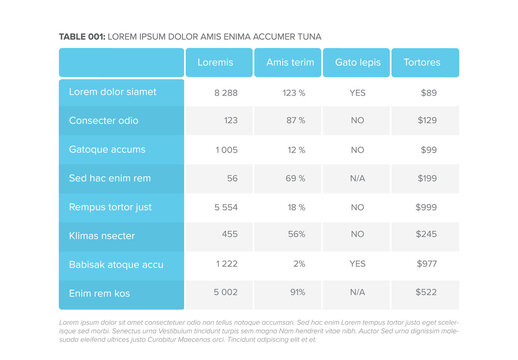

이미지 설명: 이 이미지는 표 형식의 데이터 테이블을 보여줍니다. 표의 제목은 "TABLE 001: LOREM IPSUM DOLOR AMIS ENIMA ACCUMER TUNA"입니다. 표는 다섯 개의 열과 여덟 개의 행으로 구성되어 있습니다.

- 첫 번째 행은 열 제목으로 구성되어 있습니다:
  - "Loremis"
  - "Amis terim"
  - "Gato lepis"
  - "Tortores"

- 각 행은 다양한 데이터 값을 포함하고 있습니다:
  - 첫 번째 행: "Lorem dolor siamet", 8,288, 123%, YES, $89
  - 두 번째 행: "Consecter odio", 123, 87%, NO, $129
  - 세 번째 행: "Gatoque accums", 1,005, 12%, NO, $199
  - 네 번째 행: "Sed hac enim rem", 56, 69%, N/A, $199
  - 다섯 번째 행: "Rempus tortor just", 5,554, 18%, NO, $999
  - 여섯 번째 행: "Klimas nsecter", 455, 56%, NO, $245
  - 일곱 번째 행: "Babiask atque accu", 1,222, 2%, YES, $977
  - 여덟 번째 행: "Enim rem kos", 5,002, 91%, N/A, $522

표의 하단에는 작은 글씨로 "Lorem ipsum dolor sit amet consectetur..."로 시작하는 긴 설명 문구가 있습니다.


In [15]:
# 샘플 이미지 주소(웹사이트로 부터 바로 인식)
IMAGE_URL = "https://t3.ftcdn.net/jpg/03/77/33/96/360_F_377339633_Rtv9I77sSmSNcev8bEcnVxTHrXB4nRJ5.jpg"

# 이미지 파일로 부터 질의
print(multimodal_llm.invoke(IMAGE_URL))


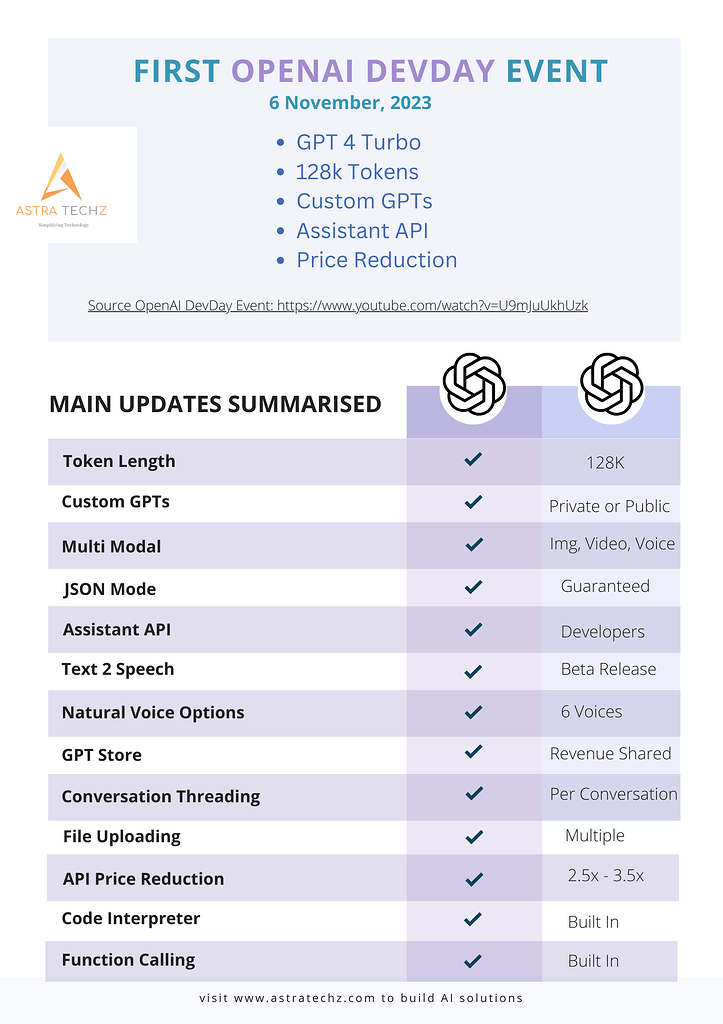

In [16]:
# 로컬 PC 에 저장되어 있는 이미지의 경로 입력
IMAGE_PATH_FROM_FILE = "./images/sample-image.png"

# 이미지 파일로 부터 질의(스트림 방식)
answer = multimodal_llm.stream(IMAGE_PATH_FROM_FILE)

In [17]:
# 스트리밍 방식으로 각 토큰을 출력합니다. (실시간 출력)
for token in answer:
    print(token.content, end="", flush=True)

이미지 설명 (대체 텍스트):

이 이미지는 "FIRST OPENAI DEVDAY EVENT"에 대한 정보를 제공하는 포스터입니다. 이벤트는 2023년 11월 6일에 열립니다. 주요 발표 내용은 다음과 같습니다:
- GPT 4 Turbo
- 128k Tokens
- Custom GPTs
- Assistant API
- Price Reduction

이미지 왼쪽 상단에는 "ASTRA TECHZ" 로고가 있습니다. 

주요 업데이트 요약은 다음과 같습니다:
- Token Length: 128K
- Custom GPTs: Private or Public
- Multi Modal: Img, Video, Voice
- JSON Mode: Guaranteed
- Assistant API: Developers
- Text 2 Speech: Beta Release
- Natural Voice Options: 6 Voices
- GPT Store: Revenue Shared
- Conversation Threading: Per Conversation
- File Uploading: Multiple
- API Price Reduction: 2.5x - 3.5x
- Code Interpreter: Built In
- Function Calling: Built In

이미지 하단에는 "visit www.astratechz.com to build AI solutions"라는 문구가 있습니다.

## System, User 프롬프트 수정

In [29]:
system_prompt = """당신은 표(재무제표) 를 해석하는 금융 AI 어시스턴트 입니다. 
당신의 임무는 주어진 테이블 형식의 재무제표를 바탕으로 흥미로운 사실을 정리하여 친절하게 답변하는 것입니다."""

user_prompt = """당신에게 주어진 표는 회사의 재무제표 입니다. 흥미로운 사실을 정리하여 답변하세요."""

# 멀티모달 객체 생성
multimodal_llm_with_prompt = MultiModal(
    llm, system_prompt=system_prompt, user_prompt=user_prompt
)


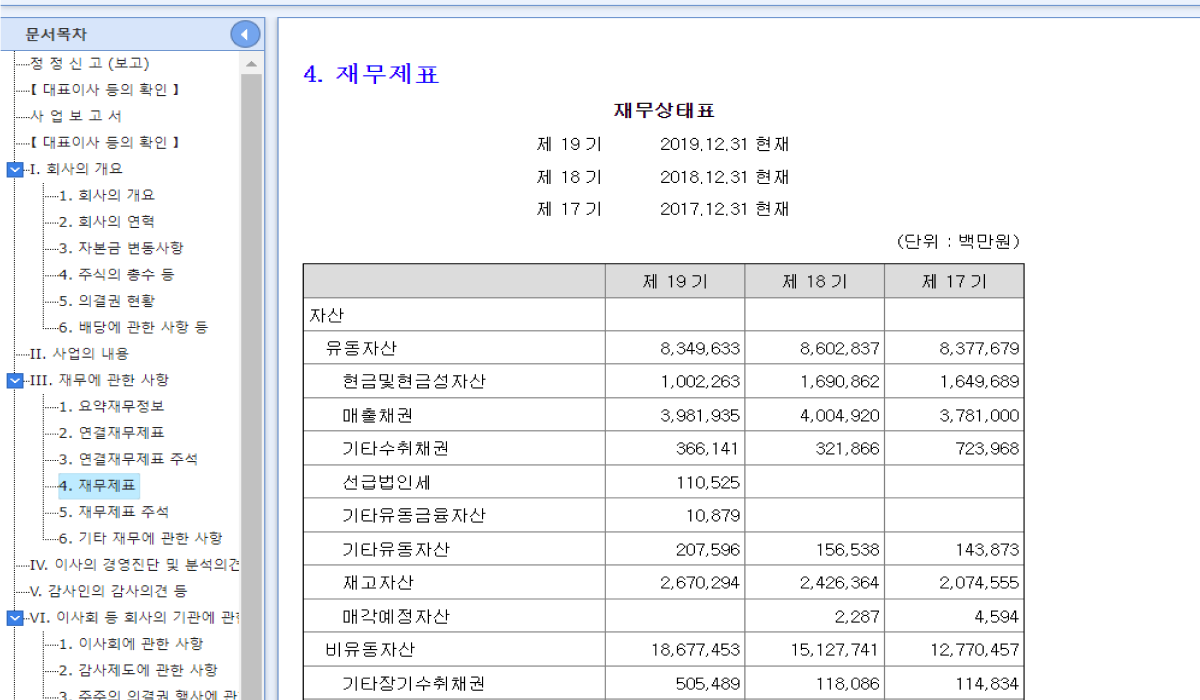

In [30]:
# 로컬 PC 에 저장되어 있는 이미지의 경로 입력
IMAGE_PATH_FROM_FILE = "https://storage.googleapis.com/static.fastcampus.co.kr/prod/uploads/202212/080345-661/kwon-01.png"

# 이미지 파일로 부터 질의(스트림 방식)
answer = multimodal_llm_with_prompt.stream(IMAGE_PATH_FROM_FILE)

In [31]:
# 스트리밍 방식으로 각 토큰을 출력합니다. (실시간 출력)
for token in answer:
    print(token.content, end="", flush=True)

주어진 재무제표를 바탕으로 몇 가지 흥미로운 사실을 정리해 보았습니다:

1. **유동자산의 변화**:
   - 제 19기(2019년) 유동자산은 8,349,633백만원으로, 제 18기(2018년) 8,602,837백만원에 비해 감소했습니다.
   - 제 17기(2017년) 유동자산은 8,377,679백만원으로, 제 18기와 제 19기 사이에서 큰 변동이 없음을 알 수 있습니다.

2. **현금 및 현금성 자산**:
   - 제 19기 현금 및 현금성 자산은 1,002,263백만원으로, 제 18기 1,690,862백만원에 비해 크게 감소했습니다.
   - 제 17기 현금 및 현금성 자산은 1,649,689백만원으로, 제 18기와 유사한 수준이었습니다.

3. **매출채권**:
   - 제 19기 매출채권은 3,981,935백만원으로, 제 18기 4,004,920백만원에 비해 소폭 감소했습니다.
   - 제 17기 매출채권은 3,781,000백만원으로, 제 18기와 제 19기보다 낮은 수준이었습니다.

4. **기타수취채권**:
   - 제 19기 기타수취채권은 366,141백만원으로, 제 18기 321,866백만원에 비해 증가했습니다.
   - 제 17기 기타수취채권은 723,968백만원으로, 제 18기와 제 19기에 비해 상당히 높은 수준이었습니다.

5. **비유동자산**:
   - 제 19기 비유동자산은 18,677,453백만원으로, 제 18기 15,127,741백만원에 비해 크게 증가했습니다.
   - 제 17기 비유동자산은 12,770,457백만원으로, 제 18기와 제 19기보다 낮은 수준이었습니다.

6. **기타장기수취채권**:
   - 제 19기 기타장기수취채권은 505,489백만원으로, 제 18기 118,086백만원에 비해 크게 증가했습니다.
   - 제 17기 기타장기수취채권은 114,834백만원으로, 제 18기와 유사한 수준이었습니다.

이러한 변동 사항들을 통해 회사의 자산 구조와 재무 상태의 변화를 파악할 수 있습니다. 특히 비유동자산의

In [28]:
from langchain_core.prompts import PromptTemplate

prompt = PromptTemplate.from_template(
    """당신은 제무제표에 대한 해석을 바탕으로 재무제표에 대한 인사이트를 도출하는 AI 어시스턴트 입니다.
다음은 재무제표에 대한 내용입니다. 다음 내용을 바탕으로, 투자자 관점에서 회사의 재무 건전성을 평가하고, 투자를 결정하는데 도움이 되는 인사이트를 도출하세요.

#재무제표:
{content}

#Answer:                                   
"""
)

finance_model = ChatOpenAI(model_name="gpt-4-turbo", temperature=0)

analysis_chain = prompt | finance_model

In [ ]:
analysis_chain.invoke({"